# Homework Lecture 4:

Write a program to numerically evaluate the derivative of f(x)=cos x at an arbitrary position x.

1) Evaluate the derivative at position x using the forward difference scheme. Plot log(Error)=log10|f’(numerically)-f’(analytic)| against log10(dx) for dx=1e-16,1e-15,….,0.1 at x=π/4. You should find Error~$dx^n$; what is n? what is the optimal value for dx.

2) Repeat the exercise using the central difference scheme. Why this scheme is better?

3) Repeat (2) for x=0. Why do the results differ? (hint: write out the error term derived in the class explicitly by plugging the derivative of cos or sin)

### Forward difference:
\begin{equation}
\frac{d y(t)}{dt}_{fw} = \frac{y(t+h)-y(t)}{h}
\end{equation}

For the code we will let $h = dx$ and $t = x$
1) Evaluate the derivative at position x using the forward difference scheme.

In [1]:
from pylab import *
import numpy as np

def dforward(y,x,dx):
    '''
    function to calculate the derivative using the forward difference scheme
    '''
    return (y(x+dx)-y(x))/dx

Plot log(Error)=log10|f’(numerically)-f’(analytic)| against log10(dx) for dx=1e-16,1e-15,….,0.1 at x=π/4. You should find Error~$dx^n$; what is n? what is the optimal value for dx.

- First we have to make an array of f(x) and dx values to store the points for the plot

In [4]:
x=pi/4.0
dx=[]
y=[]
for dX in 10**np.arange(-16., 0., 1.0):
    Y=dforward(cos,x,dX)
    #Check that the dx values are correct
    print('dx %g,  y %g'%(dX,Y))
    dx.append(dX)
    y.append(Y)
    
print('\n The analytic result is -sin(pi/4)=', (-sin(pi/4.0)))

dx 1e-16,  y -1.11022
dx 1e-15,  y -0.777156
dx 1e-14,  y -0.710543
dx 1e-13,  y -0.707212
dx 1e-12,  y -0.707101
dx 1e-11,  y -0.707112
dx 1e-10,  y -0.707107
dx 1e-09,  y -0.707107
dx 1e-08,  y -0.707107
dx 1e-07,  y -0.707107
dx 1e-06,  y -0.707107
dx 1e-05,  y -0.70711
dx 0.0001,  y -0.707142
dx 0.001,  y -0.70746
dx 0.01,  y -0.710631
dx 0.1,  y -0.741255

 The analytic result is -sin(pi/4)= -0.7071067811865475


- Now we will calculate the error and make the plot

error: [4.03116243e-01 7.00493361e-02 3.43595457e-03 1.05285500e-04
 5.73680279e-06 5.36542746e-06 1.85687662e-07 3.63569428e-08
 1.41524823e-08 3.52467198e-08 3.53547661e-07 3.53552457e-06
 3.53541612e-05 3.53435510e-04 3.52371939e-03 3.41479639e-02]


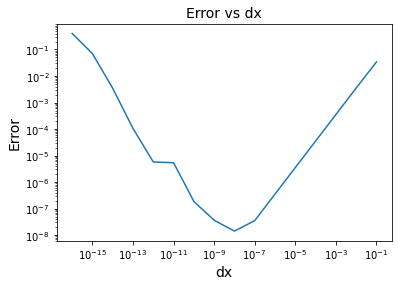

In [19]:
#error=f(numerical)-f(analytic)
error=abs(y+sin(pi/4.0))
print('error:',error)

plt.plot(dx, error)
plt.xscale('log') #this is the dx axis that should be log(dx)
plt.yscale('log') #this is the error axis that should be log(error)
plt.title('Error vs dx', fontsize=14)
plt.xlabel('dx', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.show()

From the plot we can see that the best value for dx is about $10^{-8}$.
Since the error is of the first order $O(h)$, the error is approximately equal to $dx^1$.
I am confused a little becuase I know that the error is supposed to be linear but this plot is more quadratic.
I'm not sure if I made a mistake somewhere or what.

2) Repeat the exercise using the central difference scheme. Why this scheme is better?

\begin{equation}
\frac{d y(t)}{dt}_{cd} = \frac{y(t+h/2)-y(t-h/2)}{h}
\end{equation}

In [8]:
def dcentral(y,x,dx):
    '''
    function to calculate the derivative using central difference scheme
    '''
    return (y(x+(dx/2))-y(x-(dx/2)))/dx

dx2=[]
y2=[]
for dX2 in 10**np.arange(-16., 0., 1.0):
    Y2=dcentral(cos,x,dX2)
    #Check that the dx values are correct
    print('dx %g,  y %g'%(dX2,Y2))
    dx2.append(dX2)
    y2.append(Y2)

print('\n The analytic result is -sin(pi/4)=', (-sin(pi/4.0)))

dx 1e-16,  y 0
dx 1e-15,  y -0.777156
dx 1e-14,  y -0.710543
dx 1e-13,  y -0.706102
dx 1e-12,  y -0.707212
dx 1e-11,  y -0.707101
dx 1e-10,  y -0.707107
dx 1e-09,  y -0.707107
dx 1e-08,  y -0.707107
dx 1e-07,  y -0.707107
dx 1e-06,  y -0.707107
dx 1e-05,  y -0.707107
dx 0.0001,  y -0.707107
dx 0.001,  y -0.707107
dx 0.01,  y -0.707104
dx 0.1,  y -0.706812

 The analytic result is -sin(pi/4)= -0.7071067811865475


error: [7.07106781e-01 7.00493361e-02 3.43595457e-03 1.00493752e-03
 1.05285500e-04 5.73680279e-06 1.85687662e-07 3.63569428e-08
 8.05197820e-09 8.29806002e-10 5.83724180e-11 2.86137780e-12
 2.94849922e-10 2.94628513e-08 2.94627458e-06 2.94590999e-04]


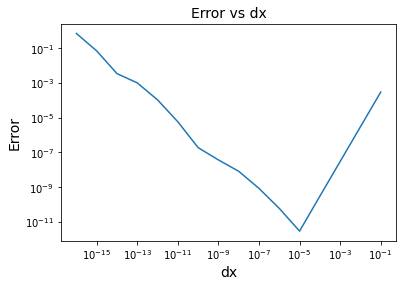

In [9]:
error2=abs(y2+sin(x))
print('error:',error2)

plt.plot(dx2, error2)
plt.xscale('log')
plt.yscale('log')
plt.title('Error vs dx', fontsize=14)
plt.xlabel('dx', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.show()

Since the error is proportional to dx, the central difference error is smaller because for the formula we take $\frac{dx}{2}$. So we are taking the difference of only half a step forward and half a step back.

We can see from the plot that the best value for dx is $10^{-5}$, this is another reason why this scheme is better, because we can have a larger dx and get less error.
Since the error is of the second order $O(h^2)$, the error is approximately equal to $dx^2$ which is smaller than for a first order error.

3) Repeat (2) for x=0. Why do the results differ? (hint: write out the error term derived in the class explicitly by plugging the derivative of cos or sin)

The error for Central Difference is $O(h^2)$, so we will explicitly plug in the values to
\begin{equation}
O(h^2) = \frac{h^2}{4 \cdot 3!} * y'''(t) + \frac{h^4}{16 \cdot 5!} y'''''(t)+...
\end{equation}
Plugging in the values, we have
\begin{equation}
O(h^2) = \frac{h^2 sin(x)}{24} - \frac{h^4 sin(x)}{1920}.
\end{equation}

dx 1e-16,  y 0
dx 1e-15,  y 0
dx 1e-14,  y 0
dx 1e-13,  y 0
dx 1e-12,  y 0
dx 1e-11,  y 0
dx 1e-10,  y 0
dx 1e-09,  y 0
dx 1e-08,  y 0
dx 1e-07,  y 0
dx 1e-06,  y 0
dx 1e-05,  y 0
dx 0.0001,  y 0
dx 0.001,  y 0
dx 0.01,  y 0
dx 0.1,  y 0

 error: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<ipython-input-11-4617b6d8384a>:16: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


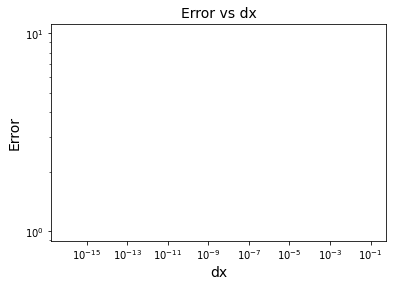

In [11]:
x3=0
dx3=[]
y3=[]
for dX3 in 10**np.arange(-16., 0., 1.0):
    Y3=dcentral(cos,x3,dX3)
    #Check that the dx values are correct
    print('dx %g,  y %g'%(dX3,Y3))
    dx3.append(dX3)
    y3.append(Y3)
    
error3=abs(y3+sin(x3))
print('\n error:',error3)

plt.plot(dx3, error3)
plt.xscale('log')
plt.yscale('log')
plt.title('Error vs dx', fontsize=14)
plt.xlabel('dx', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.show()

The error is zero because the derivative of $cos(x)$ is $-sin(x)$.
If we plug zero in, $-sin(0)=0$.
When we compute the central difference, our terms drop to zero which is the same as the analytic answer.
This is different from using another value because when $x=0$ for $sin(x)$ we will get zero and same for $x=\frac{\pi}{2}$ for $cos(x)$.